# House Prices Sales Prediction - Gianmaria Pizzo

# 1 - Domain Research

Some of these columns are not useful for our purpose, this is why after an extensive research we understood the main driving factors for house prices:
1. Neighborhood comps
2. Location
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. The local market and economic change
7. Mortgage interest rate

However, we do not have data for each one of those points and most of them are hard to represent in the way the datasets are given to us (even if wanted to add some features of our own).

# 2 - Data Exploration

In [149]:
%matplotlib notebook

from scipy.io import arff
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

sns.set()
sns.set_style("darkgrid")

## Dataset Loading

In [150]:
# TODO: get from env
data = arff.loadarff(r'C:\Users\PayThePizzo\PycharmProjects\pythonProject\resources\ames_housing.arff')
# data = arff.loadarff(r'/Users/gianmariapizzo/PycharmProjects/HouseSalesPricePrediction/resources/ames_housing.arff')
df = pd.DataFrame(data[0])
df.shape

(2930, 81)

We have 2930 objects and 81 columns! That is a lot of data for each single object, we need to find out what are the best ones for the job.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   float64
 3   Lot_Area            2930 non-null   float64
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

The dataset appears to be very complete, and ready to work with. It has **0 missing information**! This means we can avoid:
* Dropping any of the rows, for missing important info;
* Dropping columns, for missing more than X% of data;

The features are mostly objects
* 35 `float64`
* 46 `object`

However, we notice that features such as Latitude and Longitude will have to be removed as they lead to overfitting. Furthermore, miscellaneous features and their values might be hard to consider as they count only for some instances.

## Numeric Features

Let's have a look to the numeric features:

In [152]:
# We keep Latitude and Longitude just for now
df.drop(columns=['Misc_Val', 'Misc_Feature'], inplace=True)
df.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,47.533447,23.011604,2.592491,16.002048,2.243345,6.216041,2007.790444,180796.060068,-93.642897,42.034482
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,67.483400,64.139059,25.141331,56.087370,35.597181,2.714492,1.316613,79886.692357,0.025700,0.018410
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-93.693153,41.986498
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,-93.660218,42.022088
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,-93.641806,42.034662
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,-93.622113,42.049853
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,12.000000,2010.000000,755000.000000,-93.577427,42.063388


We now consider 

<IPython.core.display.Javascript object>


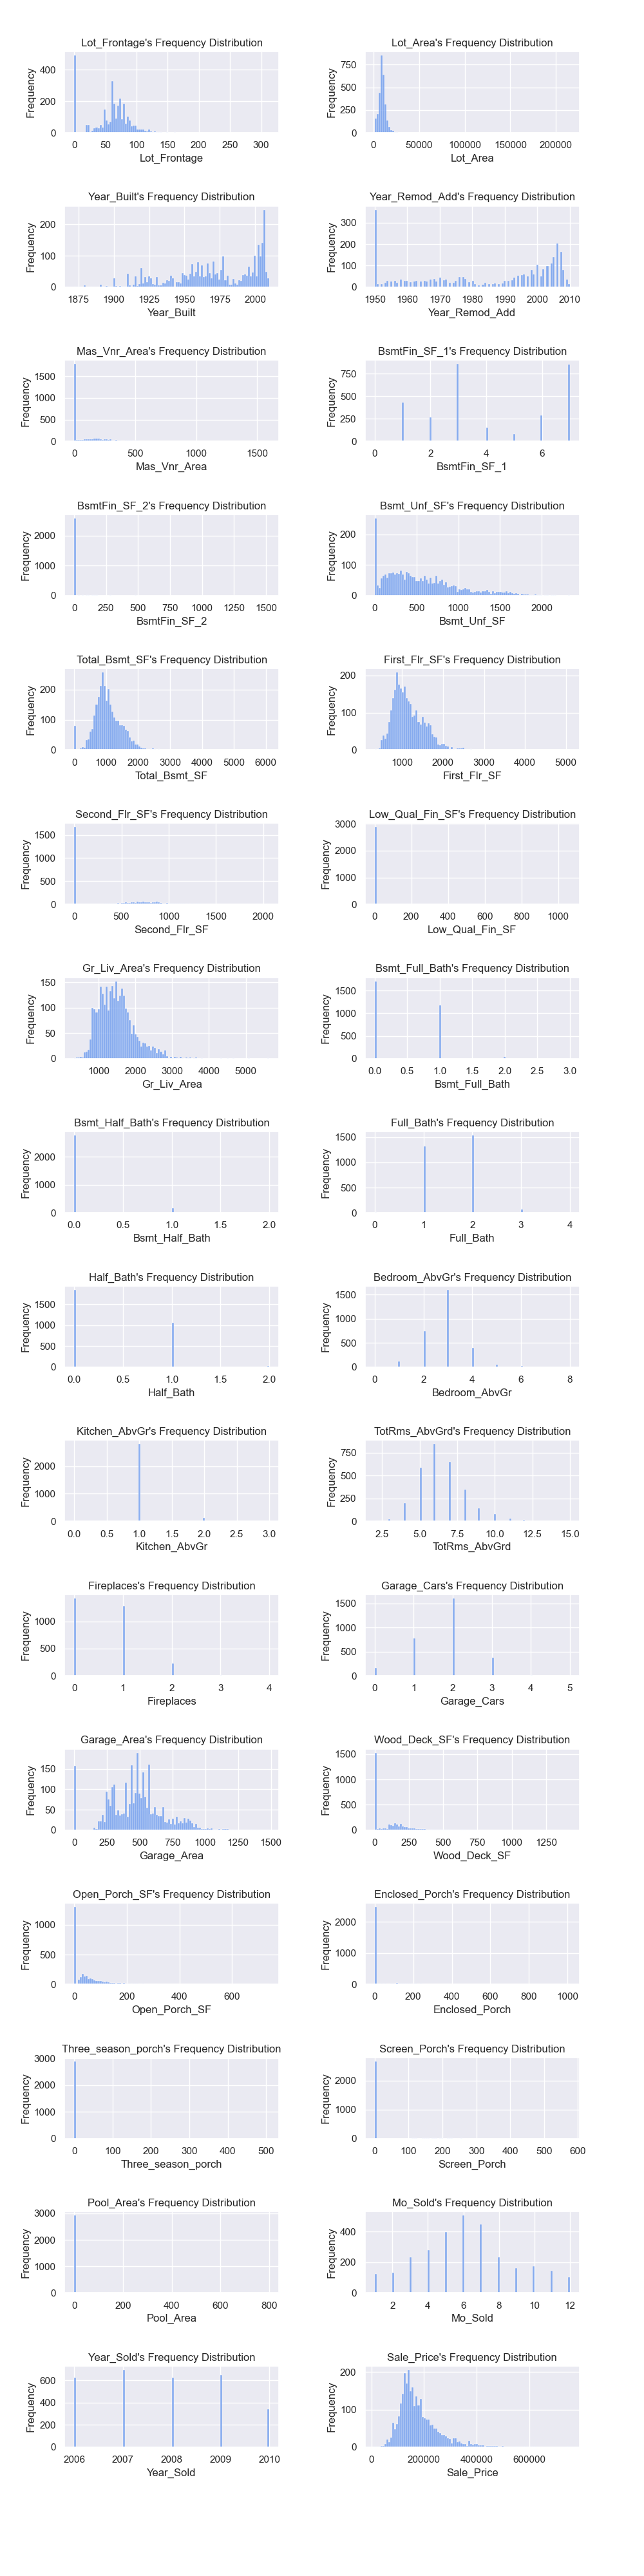

In [114]:
def plot_frequency_distr_numeric(dataset, include_kde=False, plot_cols=2, notebook_fig_size=None, adjust=None):
    """
    Given a dataset, it plots the frequency distributions of its numeric features through histograms from seaborn
    :param include_kde: boolean representing whether to include kde
    :param dataset: pandas dataframe
    :param plot_cols: count of plots per column
    :param notebook_fig_size: dictionary of integers including keys 'width', 'height' which represent the measures in inches for notebook display purposes
    :param adjust: dictionary of float including keys 'left', 'right', 'top', 'bottom', 'wspace', 'hspace' which are used to space the different plots between them
    """
    # Numeric dataframe
    num_df = dataset.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
    
    # Set subplot shape
    fig, axes = plt.subplots(nrows = int(np.ceil(num_df.shape[1]/plot_cols)), ncols = plot_cols)
    # Flat 1-D flat iterator over the array.
    axes = axes.flatten()
    
    # Notebook figure dimensions
    if notebook_fig_size is None:
        # Default
        fig.set_size_inches(10, 40)
    else:
        fig.set_size_inches(notebook_fig_size.get('width'), notebook_fig_size.get('height'))
    
    # Plot distribution for each feature
    for ax, col in zip(axes, num_df.columns):
        sns.histplot(num_df[col], ax = ax, color='cornflowerblue', bins=100, kde=include_kde)
        ax.set_title(col+'\'s Frequency Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
    # Adjust spacing between plots
    if adjust is None:
        # Default
        plt.subplots_adjust(left=0.1, right=0.9, top=0.98, bottom=0.05, wspace=0.4, hspace=0.9)
    else:
        plt.subplots_adjust(left=adjust.get('left'), right=adjust.get('right'), 
                            top=adjust.get('top'), bottom=adjust.get('bottom'),
                            wspace=adjust.get('wspace'), hspace=adjust.get('hspace'))
    pass

plot_frequency_distr_numeric(dataset=df.loc[:, ~df.columns.isin(['Latitude', 'Longitude'])], plot_cols=2)

## Categorical Features

Now let us preview the categorical features:

In [115]:
# We use a decoded version of the dataset to display the labels better
def decode_byte_str(dataset):
    categorical = df.select_dtypes(object)
    categorical = categorical.stack().str.decode('utf-8').unstack()
    for col in categorical:
        dataset[col] = categorical[col]
    pass

temp=df.copy()
decode_byte_str(dataset=temp)

<IPython.core.display.Javascript object>


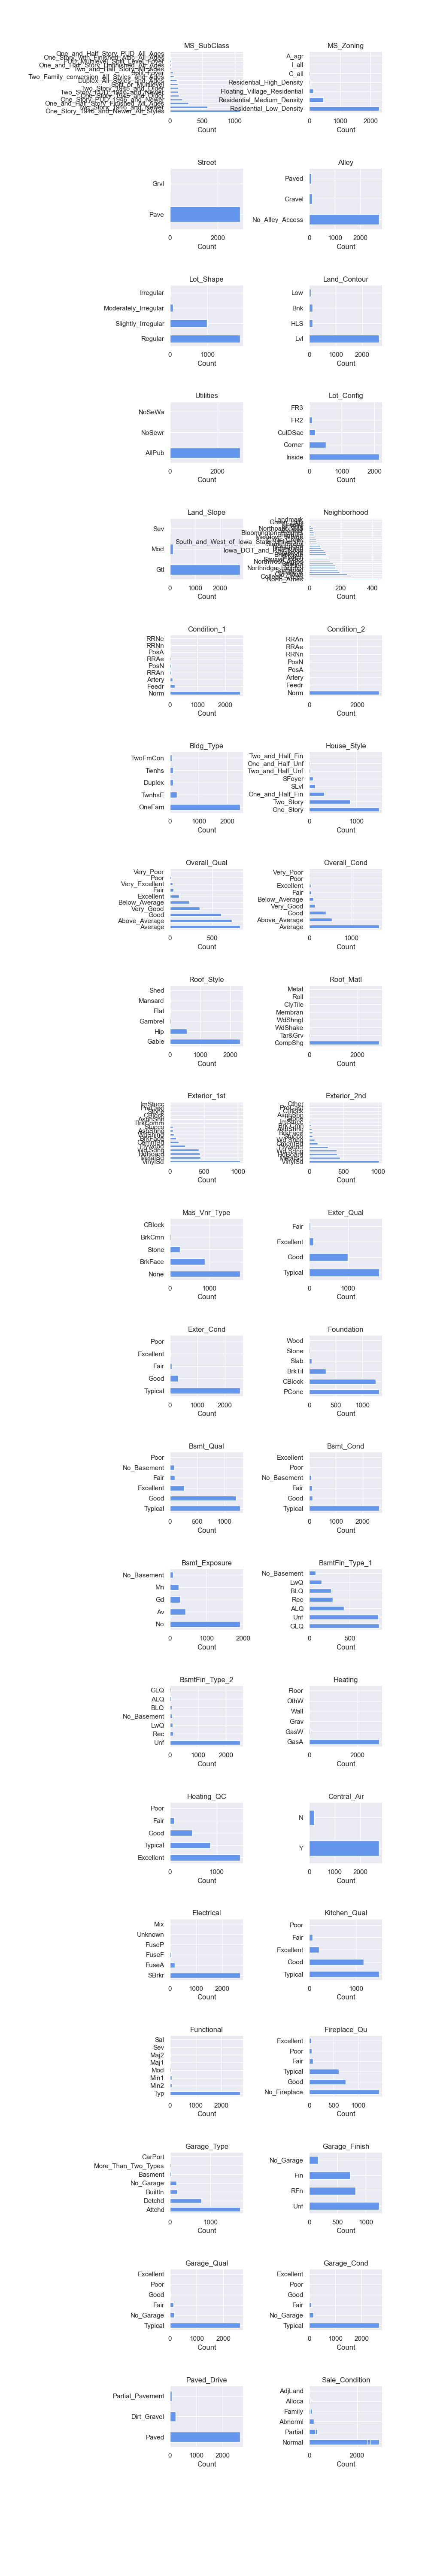

In [125]:
from itertools import zip_longest
# TO FIX
def barplot_categ(dataset):
    # Categorical Features Only 
    categorical_data = dataset.select_dtypes(object)
    # Rows
    n = categorical_data.shape[1]
    # Params for subplots
    nrows, ncols = ceil(n / 2), 2

    fig, axs = plt.subplots(ncols=ncols, nrows=21, figsize=(9.9, 60))


    for feature_name, ax in zip_longest(categorical_data, axs.ravel()):
        if feature_name is None:
            # Avoid showing axis
            ax.axis("off")
            continue

        ax = categorical_data[feature_name].value_counts().plot.barh(ax=ax, color='cornflowerblue')
        ax.set_title(feature_name)
        ax.set_xlabel('Count')

    plt.subplots_adjust(left=0.4,
                    bottom=0.05,
                    right=0.9,
                    top=0.98,
                    wspace=0.9,
                    hspace=0.9)
    pass

barplot_categ(temp)

# Exploratory Data Analysis

## Univariate Analysis (UA)
We perform an analysis of the features to remove outliers and normalize the data.

### Sale Price
Let us have a quick look at the Sales Prices. In order to add significance to the graph we want to use the colors to indicate the lot of area, and the markers to classify the type of neighborhood.


<IPython.core.display.Javascript object>


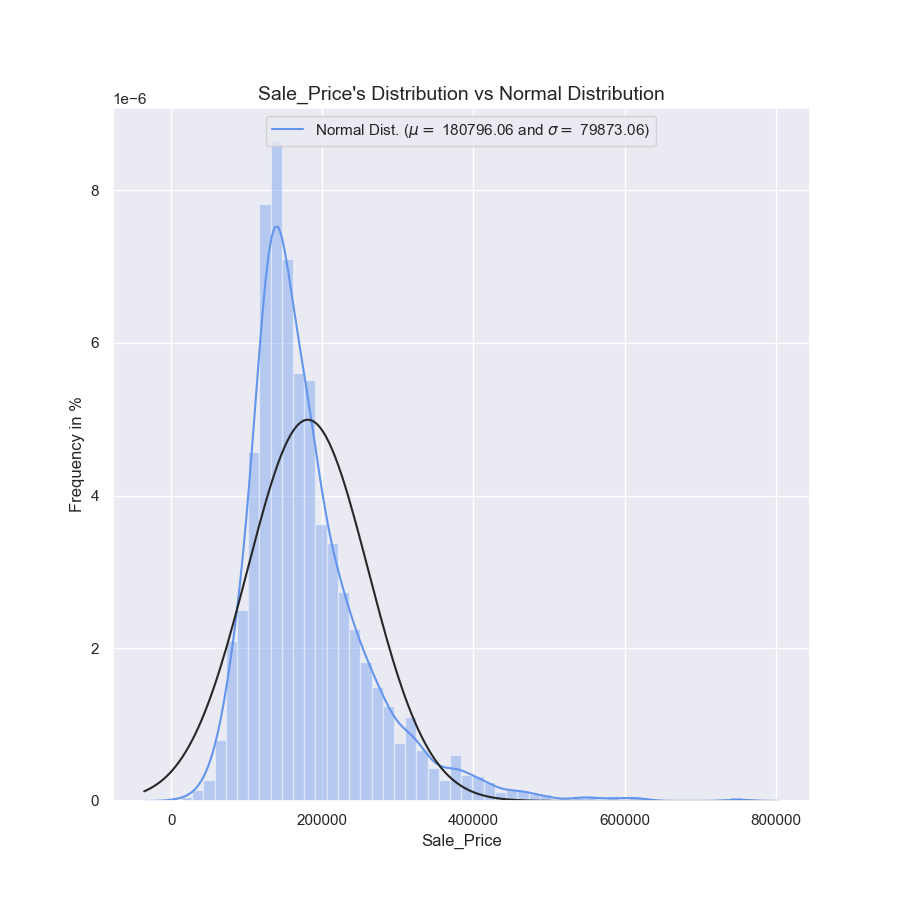

C:\Users\PayThePizzo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [126]:
def numeric_distr_plot(dataset, label, shape):
    """
    Plots a
    :param dataset:
    :param label:
    :param shape:
    :param hue:
    :return:
    """
    # Normal Distribution fit
    (mu, sigma) = stats.norm.fit(dataset[label])

    # Feature Distribution Plot
    plt.figure(figsize=shape)
    sns.distplot(dataset[label], hist=True, kde=True, fit=stats.norm, color='cornflowerblue')
    
    # Figure labels
    plt.title(label + '\'s Distribution vs Normal Distribution', fontsize=14)
    plt.xlabel(label.title())
    plt.ylabel('Frequency in %')
    plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='upper center')
    plt.show()
    pass
numeric_distr_plot(df, 'Sale_Price', (9,9))



As we can see the sample distribution highlights quite a heavy right tail compared to the left tail. Furthermore there's evidence of outliers.

As the sample distribution looks like a log-normal distribution let's try and apply a transformation to the target.

<IPython.core.display.Javascript object>


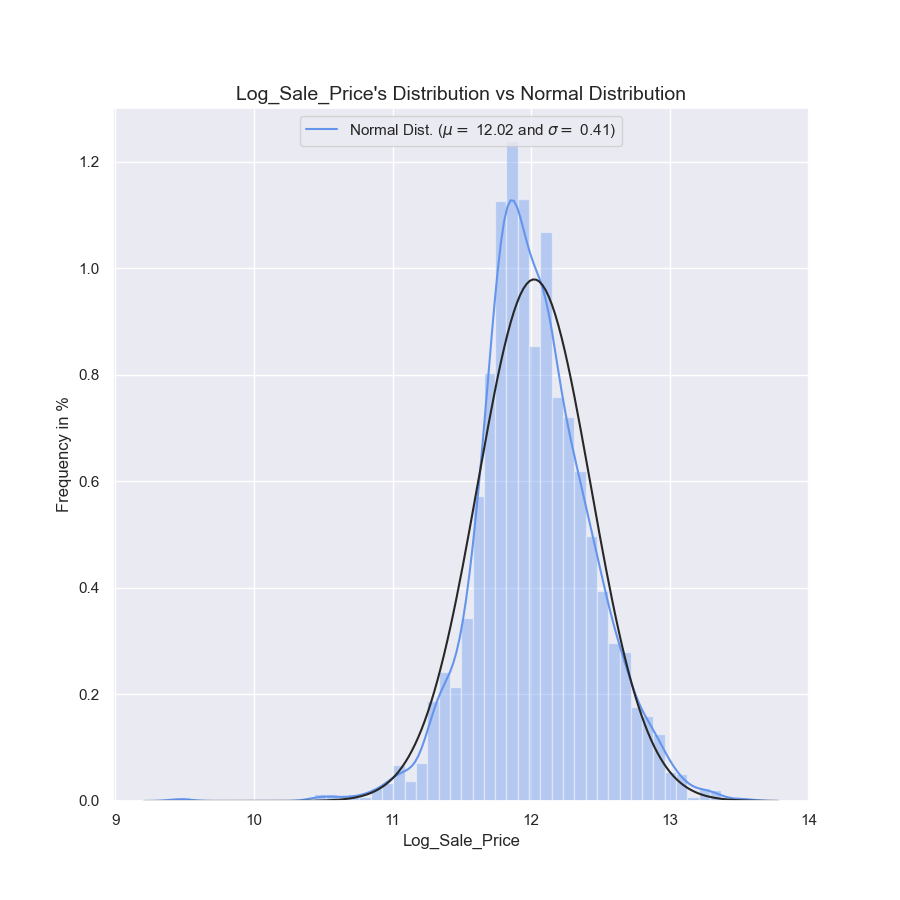

C:\Users\PayThePizzo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [127]:
# Adding Log Sale Price
df['Log_Sale_Price'] = np.log(df['Sale_Price'])
numeric_distr_plot(df, 'Log_Sale_Price', (9,9))

As we can see, the target log-transformation is almost centered around the sample mean $\mu = 12$

Let us investigate the outliers

In [128]:
def scatterplot_distr(dataset, label, shape):
    plt.figure(figsize=shape)
    plt.scatter(range(df[label].shape[0]), np.sort(dataset[label].values))
    plt.title(label + '\'s Scatter Plot')
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Sale Price', fontsize=12)
    plt.show()
    pass

<IPython.core.display.Javascript object>


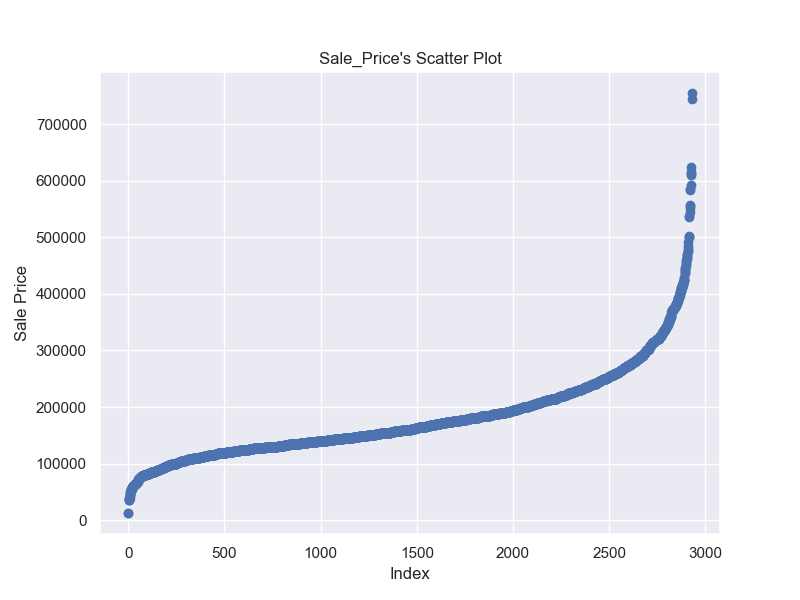

In [129]:
scatterplot_distr(df, 'Sale_Price', shape=(8,6))

It easy to see that on the top-right and bottom-left sides of the distribution we have some instances which might be problematic and we want to save them to understand whether they are possible outliers. Let's see how the `Log_Sale_Price` instances behave first.

<IPython.core.display.Javascript object>


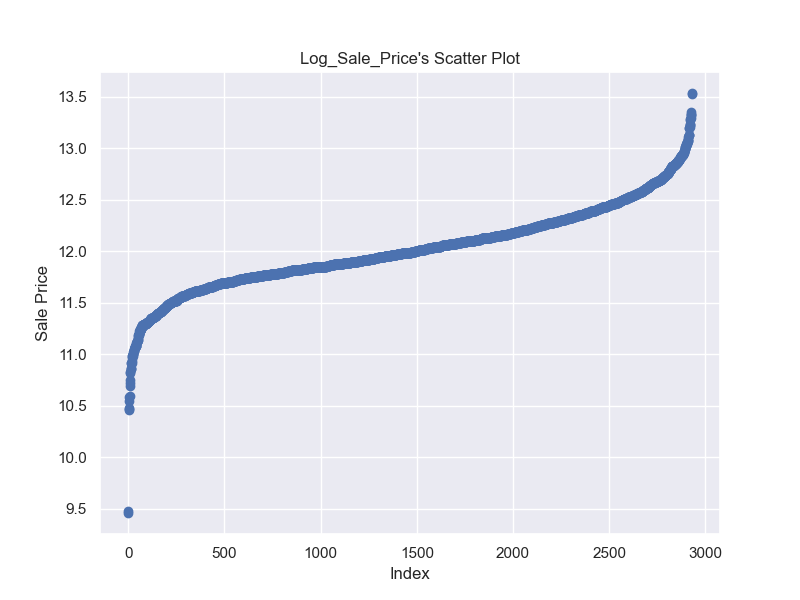

In [130]:
scatterplot_distr(df, 'Log_Sale_Price', shape=(8,6))

We can see that the transformation has highlighted some particular rows which might be problematic. We save them for a later analysis.

In [131]:
outliers = df[(df['Log_Sale_Price']>13.4) | (df['Log_Sale_Price']<9.5)]
outliers

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude,Log_Sale_Price
181,b'One_Story_1945_and_Older',b'Residential_Medium_Density',68.0,9656.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,b'No_Pool',b'No_Fence',6.0,2010.0,b'WD ',b'Abnorml',12789.0,-93.606789,42.030388,9.456341
1553,b'One_Story_1946_and_Newer_All_Styles',b'A_agr',80.0,14584.0,b'Pave',b'No_Alley_Access',b'Regular',b'Low',b'AllPub',b'Inside',...,b'No_Pool',b'No_Fence',2.0,2008.0,b'WD ',b'Abnorml',13100.0,-93.625217,42.018806,9.480368
1760,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',160.0,15623.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'Excellent',b'Minimum_Privacy',7.0,2007.0,b'WD ',b'Abnorml',745000.0,-93.657592,42.053321,13.521139
1767,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',104.0,21535.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'No_Pool',b'No_Fence',1.0,2007.0,b'WD ',b'Normal',755000.0,-93.657271,42.051980,13.534473


Let us look at the distribution without those outliers

<IPython.core.display.Javascript object>


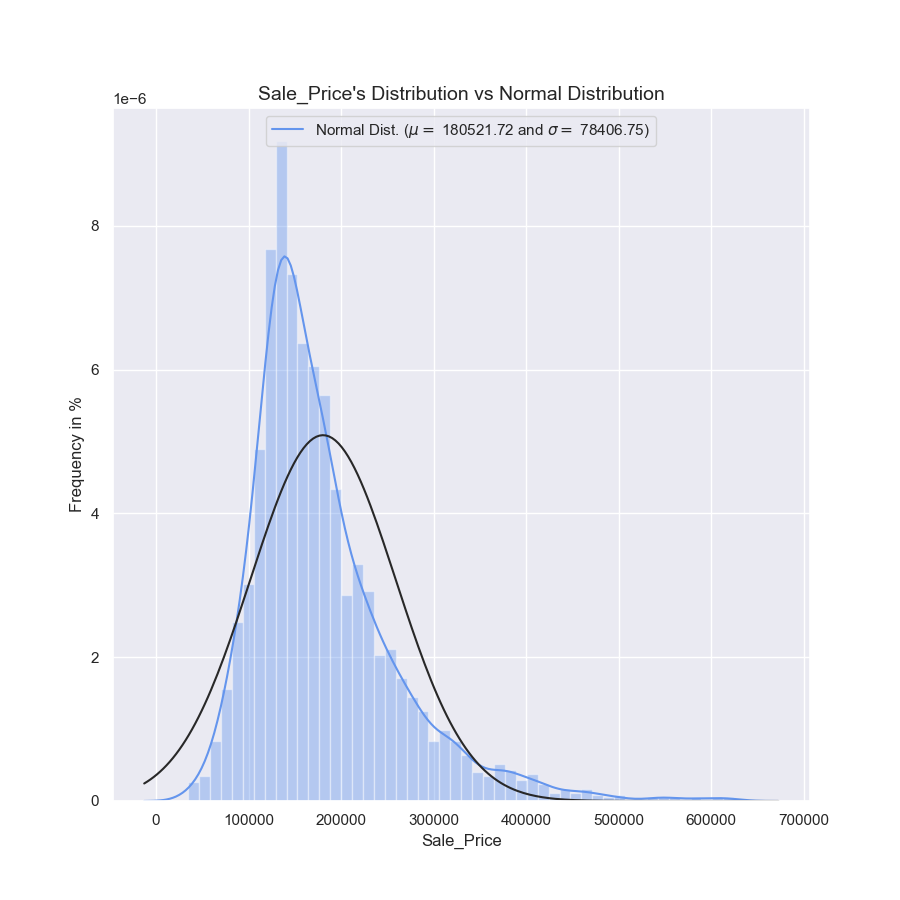

C:\Users\PayThePizzo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [132]:
numeric_distr_plot(df.drop(outliers.index), 'Sale_Price', (9,9))

<IPython.core.display.Javascript object>


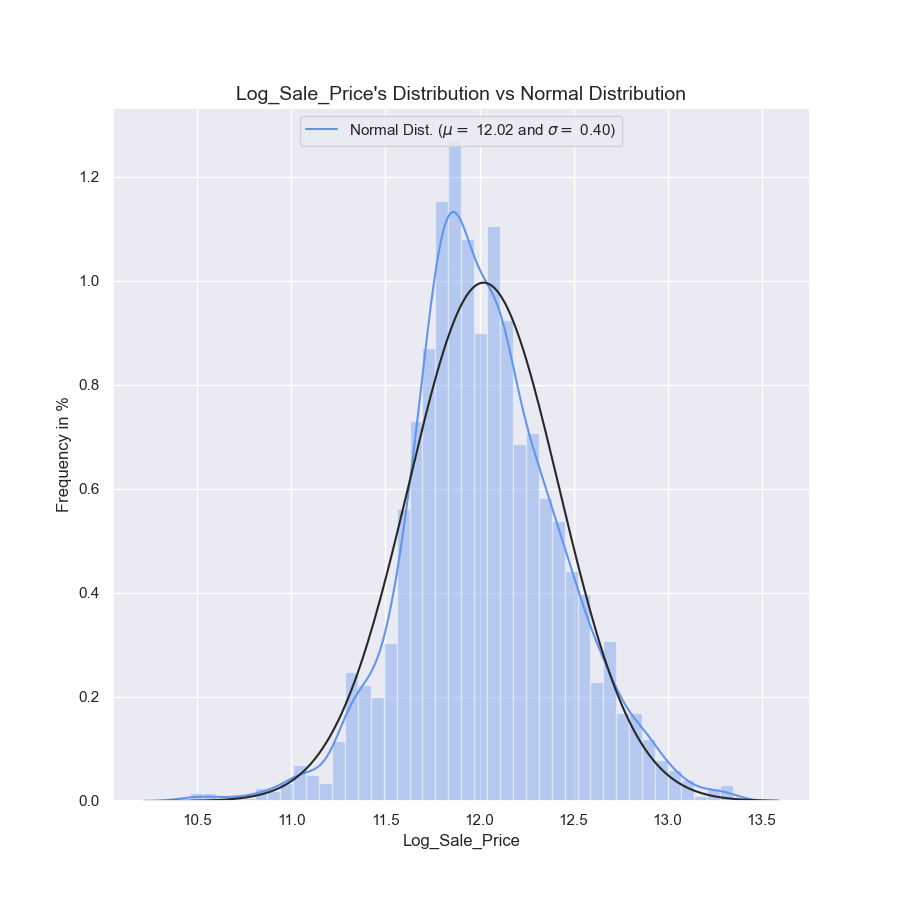

C:\Users\PayThePizzo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [133]:
numeric_distr_plot(df.drop(outliers.index), 'Log_Sale_Price', (9,9))

The skew now tends to be on the left side. We will try and adjust that later

## Bivariate Analysis

https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10

### Correlation

<IPython.core.display.Javascript object>


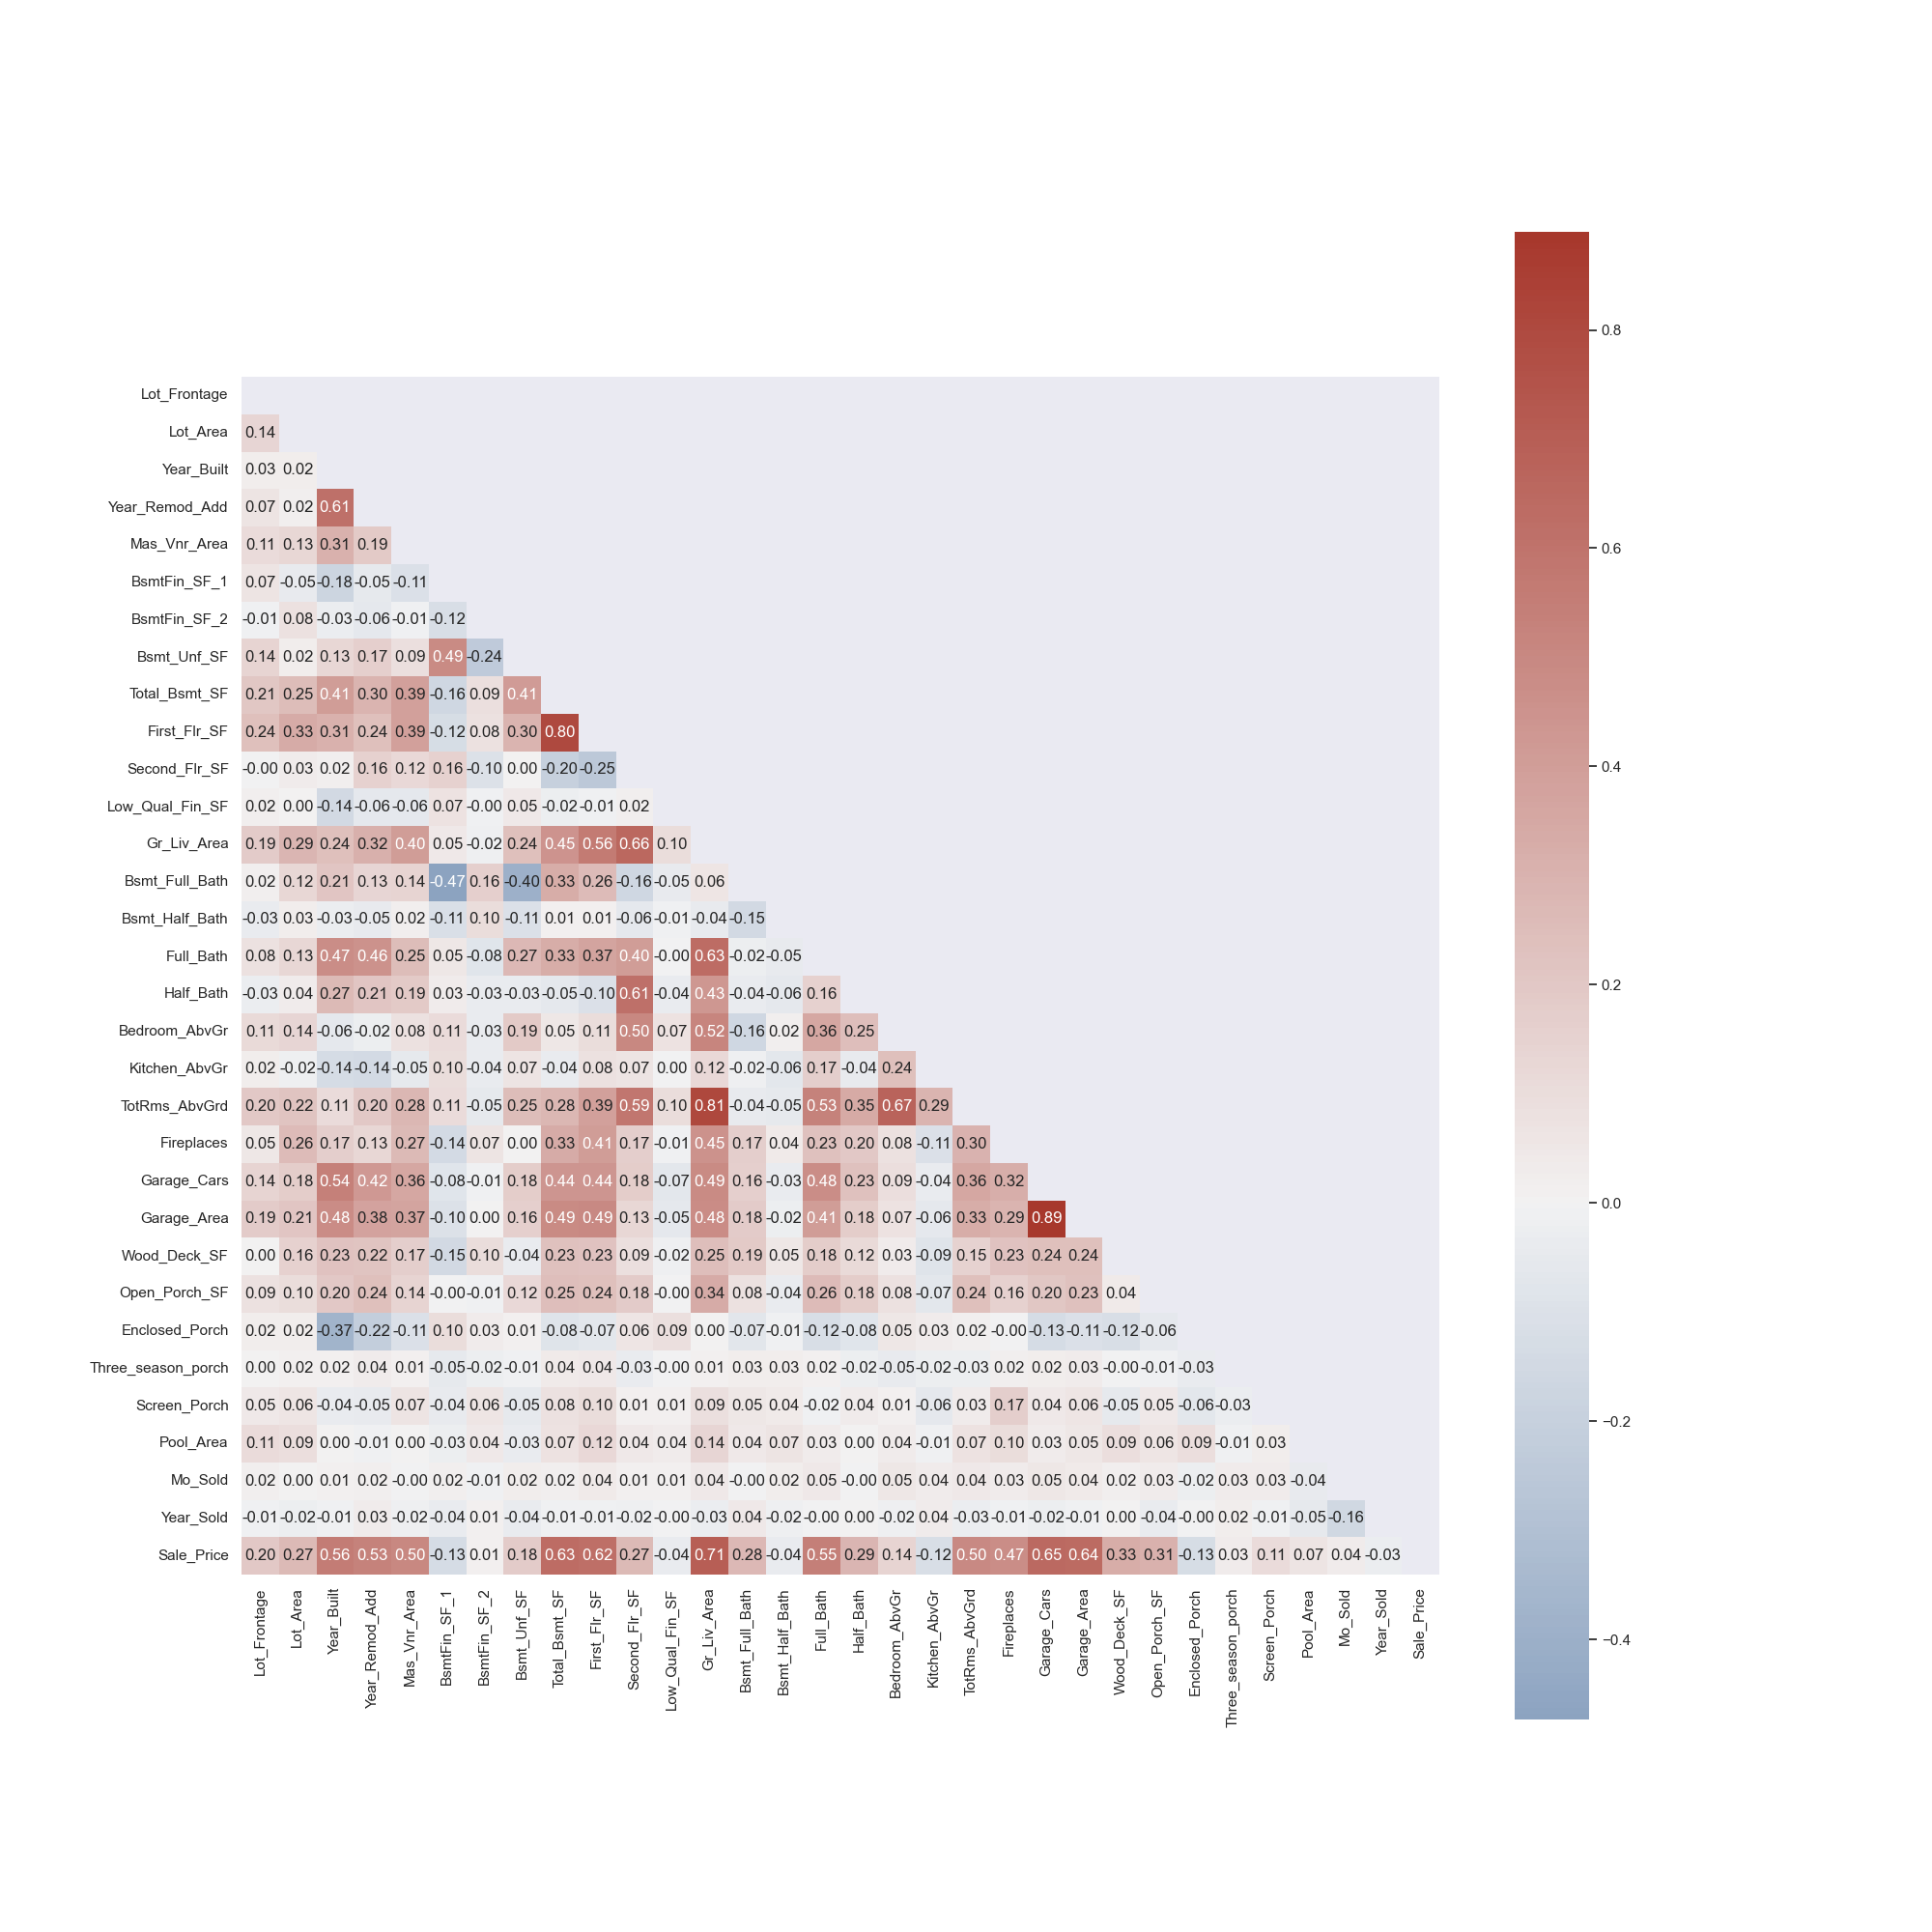

In [170]:
def display_corr_matrix(dataset, label):
    # Move target column to last index
    col = dataset.pop(label)
    dataset.insert(dataset.shape[1], label, col)

    plt.figure(figsize=(20,20))

    matrix = dataset.corr()
    # Create a custom diverging palette
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                 n=9, center="light", as_cmap=True)

    mask = np.triu(np.ones_like(matrix, dtype=bool))

    sns.heatmap(matrix, mask=mask, center=0, annot=True,
                 fmt='.2f', square=True, cmap=cmap)
    pass

display_corr_matrix(dataset=df.loc[:, ~df.columns.isin(['Latitude', 'Longitude'])], label='Sale_Price')

### Location: Neighborhood

In [ ]:
import folium
from folium import *

def get_neighborhood_markers(dataset):
    neighborhoods = dataset.loc[:,'Neighborhood'].unique()
    n_dict = {}
    for n in neighborhoods:
        n_dict.update({str(n).strip("b\'"): ''})
    pass

def get_color(dataset):
    """
    Returns color for Marker, based on price
    :param dataset: dataset containing label 'Sale_Price'
    :return: color as a string 'lightblue', 'blue', 'cadetblue', 'lightgreen', 'green', 'darkgreen', 'orange', 'lightred', 'red', 'darkred', 'purple', 'darkpurple'
    """
    # pdf log-normal distribution

    #returns the color based on the where

    pass

# Display map with coloured neighborhood
def display_map_dataset(dataset):
    subset = dataset[['Latitude', 'Longitude', 'Neighborhood', 'Sale_Price']]
    map_bounds = [subset.Latitude.min(), subset.Longitude.min(), subset.Latitude.max(), subset.Longitude.max()]

    # TODO: fix centering
    my_map = folium.Map(
        location= [subset.Latitude.max(), subset.Longitude.max()],
        tiles="OpenStreetMap",
        zoom_start=13,
        control_scale = True,
        min_lat= map_bounds[0],
        max_lat= map_bounds[2],
        min_lon= map_bounds[1],
        max_lon= map_bounds[3]
    )

    map_bounds = [[subset.Latitude.min(), subset.Longitude.min()],
              [subset.Latitude.max(), subset.Longitude.max()]]

    subset.reset_index()
    for index, row in subset.iterrows():
        coordinates = [row.Latitude, row.Longitude]
        # color based on price, icon_color based on neighborhood
        Marker(location=coordinates, popup='', icon=folium.Icon(color='purple' , icon_color='85C1E9')).add_to(my_map)
    return my_map


In [74]:
sns.jointplot(data=df, x=, y="Sale_Price", hue="Neighborhood")

<IPython.core.display.Javascript object>

ValueError: The following variable cannot be assigned with wide-form data: `hue`

Let us see if the price is influenced by neighborhood

In [10]:
# Price for each neighboorhood
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Neighborhood", y="Sale_Price", palette=["m", "g"],
            data= df)
sns.despine(offset=10, trim=True)
plt.show()

We can see the data is slightly skewed with a longer right wing

### Seasonality
https://www.bankrate.com/real-estate/best-time-to-sell-house/

We can easily see that the houses were sold between 2006 and 2010. This means it includes trends of the global state of the economy during the crisis in 2008

We can divide the years by seasons:
1. December-March
2. April-July, which are supposed to be the best time for selling
3. August-November

In [47]:
# Seasons for sales
seasons_dict = {
    'DecMar': [12,1,2,3],
    'AprJul': [4,5,6,7],
    'AugNov': [8,9,10,11]
}

def select_sort_by_col(dataset, list_of_cols):
    """
    Returns a subset of the input dataset, where the rows are sorted by the columns given
    :param dataset: pandas dataframe
    :param list_of_cols: list of strings with col labels
    :return: dataframe
    """
    return dataset[list_of_cols].sort_values(by = list_of_cols)


# A subset sorted by values, where yr and mo are converted to integers
df_yr_mo = select_sort_by_col(df, ['Year_Sold', 'Mo_Sold', 'Sale_Price']).astype(dtype={ 'Year_Sold' : 'int32', 'Mo_Sold' : 'int32'})
df_yr_mo

,Year_Sold,Mo_Sold,Sale_Price
2703,2006,1,80000.0
2603,2006,1,105000.0
2493,2006,1,120875.0
2541,2006,1,136500.0
2470,2006,1,139500.0
...,...,...,...
25,2010,7,142000.0
35,2010,7,146000.0
256,2010,7,159000.0
136,2010,7,180000.0


In [53]:
def divide_by_seasonality():
    #data structure
    year_stats = []
    for x in range(2006, 2010):
        year_x = time_df.loc[time_df.Year_Sold == x]
        mean = year_x.Sale_Price.mean()
        median = year_x.Sale_Price.median()
        second_quant = year_x.Sale_Price.quantile(q=0.25)
        third_quant = year_x.Sale_Price.quantile(q=0.75)
        # Save info by season
        for y in range (1, 12):
            if y in [1,2,3,12]:

            else if y in [4, 5, 6, 7]:

            else if y in [8, 9, 10, 11]:

        year_stats.append([x, mean, median, second_quant, third_quant])

    return year_stats

mystats = divide_by_seasonality()

plt.hist()

# Result array of 15 elements
# each element with mean, median, min, max

<IPython.core.display.Javascript object>

(array([[1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]]),
 array([  2006. ,  23305.4,  44604.8,  65904.2,  87203.6, 108503. ,
        129802.4, 151101.8, 172401.2, 193700.6, 215000. ]),
 <a list of 4 BarContainer objects>)

In [54]:
mystats

[[2006, 181761.648, 159500.0, 130000.0, 215000.0],
 [2007, 185138.2074927954, 165125.0, 130000.0, 214750.0],
 [2008, 178841.7508038585, 161000.0, 129425.0, 214000.0],
 [2009, 181404.56790123458, 160850.0, 129375.0, 213625.0]]

In [ ]:
# Distribution of Sales' Prices 

## Remove Outliers

## Area:
* Lot_Area


### External Area

In [ ]:
# Scatterplot 

# Multivariate Analysis

## Latitude and Longitude

In [ ]:
from mpl_toolkits.mplot3d import axes3d

z = df.Sale_Price
x = df.Latitude
y = df.Longitude

# TODO
# marker = Neighborhood
# color = lot_area
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='viridis', linewidths=0.5)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Sale Price')
ax.set_title('Projection of sales prices based on latitude and longitude')

plt.show()

# Clustering for distance
We will try and cluster the houses:
1. Find Neighborhood and asses mean price
2. In each Neighborhood, For each house
   * Compare how the change in one important features translates in change in price


# Categorical Data Encoding

# Feature Engineering

Based on domain knowledge & Feature importance
Dropping outliers
1. Age
2. Epoch (Year_Sold + Month_Sold)
4. Price/SqFT
5. Total Ext SqFT (Porch + Deck)

In [89]:
import datetime

df['Age'] = int(datetime.datetime.now().year) - df['Year_Built']
df['Age_Since_Remod'] = int(datetime.datetime.now().year) - df['Year_Remod_Add']
df['Price_per_SqFt'] = df['Sale_Price']/df['Lot_Area']
df['Ext_SqFt'] = df['Wood_Deck_SF'] + df['Open_Porch_SF'] + df['Screen_Porch'] + df['Enclosed_Porch'] + df['Three_season_porch']

df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude,Age,Age_Remod,Price_per_SqFt,Ext_SqFt
0,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',141.0,31770.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',215000.0,-93.619754,42.054035,62.0,62.0,6.767391,272.0
1,b'One_Story_1946_and_Newer_All_Styles',b'Residential_High_Density',80.0,11622.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2010.0,b'WD ',b'Normal',105000.0,-93.619756,42.053014,61.0,61.0,9.034590,260.0
2,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',81.0,14267.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',172000.0,-93.619387,42.052659,64.0,64.0,12.055793,429.0
3,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',93.0,11160.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',244000.0,-93.617320,42.051245,54.0,54.0,21.863799,0.0
4,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',74.0,13830.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Inside',...,2010.0,b'WD ',b'Normal',189900.0,-93.638933,42.060899,25.0,24.0,13.731020,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,b'Split_or_Multilevel',b'Residential_Low_Density',37.0,7937.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'CulDSac',...,2006.0,b'WD ',b'Normal',142500.0,-93.604776,41.988964,38.0,38.0,17.953887,120.0
2926,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',0.0,8885.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Low',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',131000.0,-93.602680,41.988314,39.0,39.0,14.743950,164.0
2927,b'Split_Foyer',b'Residential_Low_Density',62.0,10441.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',132000.0,-93.606847,41.986510,30.0,30.0,12.642467,112.0
2928,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',77.0,10010.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',170000.0,-93.600190,41.990921,48.0,47.0,16.983017,278.0


### Analysis of new features

# Data Cleaning

In [ ]:

def calc_percent_missing(df):
    nan_percent = {col : df[col].isnull().mean() for col in df.columns}
    return nan_percent

nan_percent = calc_percent_missing(data)
nan_percent = pd.DataFrame(sorted(nan_percent.items(), key=lambda x: x[1], reverse=True))
nan_percent = nan_percent[nan_percent[1] >= 0.005]

plt.figure(figsize=(24, 6))
sns.barplot(x=nan_percent[0], y=nan_percent[1] * 100)
plt.title("Percentage of missing values in data")
plt.ylabel("Percentage %")
plt.xticks(rotation=90)

In [90]:
df.drop(labels=['Wood_Deck_SF', 'Open_Porch_SF', 'Screen_Porch', 'Enclosed_Porch', 'Year_Built', 'Latitude', 'Longitude'], axis=1, inplace=True)
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude,Age,Age_Remod,Price_per_SqFt,Ext_SqFt
0,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',141.0,31770.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',215000.0,-93.619754,42.054035,62.0,62.0,6.767391,272.0
1,b'One_Story_1946_and_Newer_All_Styles',b'Residential_High_Density',80.0,11622.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2010.0,b'WD ',b'Normal',105000.0,-93.619756,42.053014,61.0,61.0,9.034590,260.0
2,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',81.0,14267.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',172000.0,-93.619387,42.052659,64.0,64.0,12.055793,429.0
3,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',93.0,11160.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Corner',...,2010.0,b'WD ',b'Normal',244000.0,-93.617320,42.051245,54.0,54.0,21.863799,0.0
4,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',74.0,13830.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Inside',...,2010.0,b'WD ',b'Normal',189900.0,-93.638933,42.060899,25.0,24.0,13.731020,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,b'Split_or_Multilevel',b'Residential_Low_Density',37.0,7937.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'CulDSac',...,2006.0,b'WD ',b'Normal',142500.0,-93.604776,41.988964,38.0,38.0,17.953887,120.0
2926,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',0.0,8885.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Low',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',131000.0,-93.602680,41.988314,39.0,39.0,14.743950,164.0
2927,b'Split_Foyer',b'Residential_Low_Density',62.0,10441.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',132000.0,-93.606847,41.986510,30.0,30.0,12.642467,112.0
2928,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',77.0,10010.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,2006.0,b'WD ',b'Normal',170000.0,-93.600190,41.990921,48.0,47.0,16.983017,278.0


# Data Normalization and Rescaling

# Assessing Feature Importance

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

def xgb_topfeatures(dataset):

    #Object Encoding
    for f in dataset.columns:
        if dataset[f].dtype == 'object':
            labeler = LabelEncoder()
            labeler.fit(list(dataset[f].values))
            dataset[f] = labeler.transform(list(dataset[f].values))

    #Inf values are as unhelpful as missing data, so we are going to substitute them as such.
    dataset = dataset.replace([np.inf, -np.inf], np.nan)
    train_y = dataset['Price_Sale'].values
    # Drop the features that may overfit the data
    df_assess = dataset.drop(['parcelid', 'logerror', 'transaction_date', 'type_property', 'type_county_land'], axis=1)
    df_assess = rescale_data_xgb(df_assess, df_assess.columns.values)
    # Drop the features that may overfit the data
    x_train = dataset.drop(["parcelid", "transaction_date", "logerror",'type_property', 'type_county_land'], axis=1)

    #Params
    xgb_params = {
        'eta': 0.05,
        'max_depth': 8,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': 0
    }

    df_train = xgb.DMatrix(df_assess, train_y, feature_names=x_train.columns.values)
    model_xgb = xgb.train(dict(xgb_params), df_train, num_boost_round=150)
    return model_xgb


def plot_top_features(xgb_model):
    feature_importance = xgb_model.get_fscore()
    top_features = pd.DataFrame()
    top_features['features'] = feature_importance.keys()
    top_features['importance'] = feature_importance.values()
    top_features.sort_values(by=['importance'],ascending=False,inplace=True)

    fig,ax= plt.subplots()
    fig.set_size_inches(20,20)
    plt.xticks(rotation=90)
    sns.barplot(data=top_features.head(20),x="importance",y="features",ax=ax,orient="h",color="#34495e")
    return top_features

model = xgb_topfeatures(df)

features = plot_top_features(model)

In [ ]:
def plot_top_features(xgb_model):
    feature_importance = xgb_model.get_fscore()
    top_features = pd.DataFrame()
    top_features['features'] = feature_importance.keys()
    top_features['importance'] = feature_importance.values()
    top_features.sort_values(by=['importance'],ascending=False,inplace=True)

    fig,ax= plt.subplots()
    fig.set_size_inches(20,20)
    plt.xticks(rotation=90)
    sns.barplot(data=top_features.head(20),x="importance",y="features",ax=ax,orient="h",color="#34495e")
    return top_features

In [ ]:
model = xgb_topfeatures(df)

In [ ]:
features = plot_top_features(model)

### Correlation between most important features

In [ ]:
topf = features["features"].tolist()[:20]

def top_features_corr(topFeatures):
    corrMatt = data2016[topFeatures].corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(20,10)
    sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True)
    pass

top_features_corr(topf)

### Conclusions
We now combine the results from XGBoost and our domain research to keep the most important features and assess an error percentage.

## Assessing & Dropping Outliers

<IPython.core.display.Javascript object>


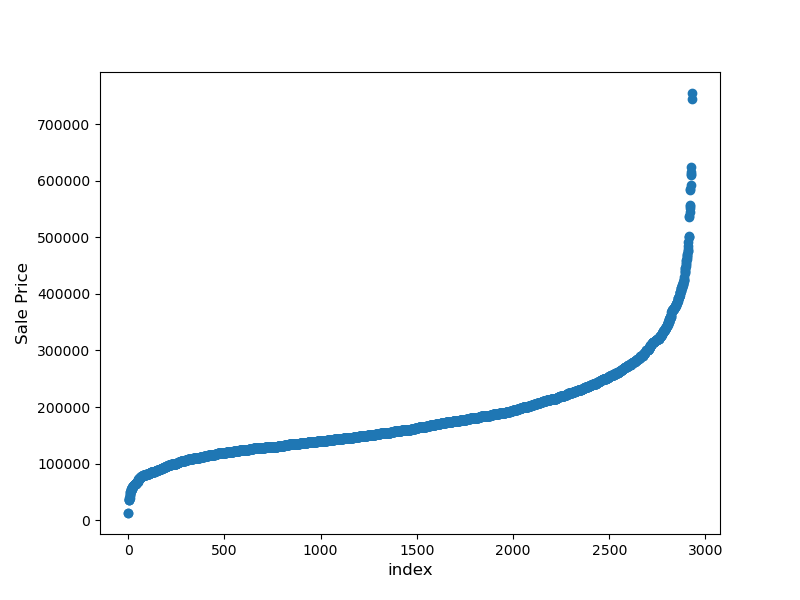

In [4]:
def plot_target_distr(dataset):
    plt.figure(figsize=(8,6))
    plt.scatter(range(dataset.shape[0]), np.sort(dataset.Sale_Price.values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel('Sale Price', fontsize=12)
    plt.show()
    pass

plot_target_distr(df)

In [53]:
# Analyze outliers

In [ ]:
# TODO: Remove outliers for price and for each column that we kept
def drop_outliers(dataset, feature, min, max):
    outliers = dataset[~dataset[feature].between(min,max)]
    dataset.drop(index = outliers.index, inplace= True)
    pass

drop_outliers(data2016, 'Sale_Price', -2.5, 3.6)

## Encoding Categorical Data

## Dropping Unhelpful Features

## Scaling & Normalization

# Pre-Training Overview
* Model Data
* Show Graphs

# Preparing Train-Test Data

In [55]:
#test
df_train = df.loc[: , ["Mo_Sold", "Year_Sold",
             "Lot_Frontage", "Lot_Area", "Year_Built", "Total_Bsmt_SF", "First_Flr_SF", 
             "Second_Flr_SF", "Full_Bath", "Half_Bath", "Gr_Liv_Area", "Bsmt_Full_Bath", 
             "Bsmt_Half_Bath", "Bedroom_AbvGr", "Kitchen_AbvGr", "TotRms_AbvGrd", 
             "Fireplaces", "Garage_Cars", "Garage_Area", "Wood_Deck_SF", 
             "Open_Porch_SF", "Enclosed_Porch", "Three_season_porch", "Screen_Porch",
            "Pool_Area"]]

df_target = df.loc[: , ['Sale_Price']]

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Split 60/20/20
X_train_80, X_test, y_train_80, y_test = train_test_split(df_train, df_target,
                                                          test_size = 0.20, random_state = 33)

X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, 
                                                       test_size=0.25, random_state=42)

accuracies = []

for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    # train and predict
    model = SVC(C=c, kernel='poly')
    model.fit(X_train, y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, 
                               y_pred = model.predict(X_train))
    valid_acc = accuracy_score(y_true = y_valid, 
                               y_pred = model.predict(X_valid))
    print ("C: {:8.3f} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}"
           .format( c, train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, c] ]

best_accuracy, best_c = max(accuracies)
print ( "Best C:", best_c )

# here we are using both training and validation,
# to exploit the most data
model = SVC(C=best_c, kernel='poly')
model.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true = y_test, 
                          y_pred = model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

C:    0.001 - Train Accuracy: 0.018 - Validation Accuracy: 0.009
C:    0.010 - Train Accuracy: 0.018 - Validation Accuracy: 0.009
C:    0.100 - Train Accuracy: 0.020 - Validation Accuracy: 0.009
C:    1.000 - Train Accuracy: 0.024 - Validation Accuracy: 0.010
C:   10.000 - Train Accuracy: 0.047 - Validation Accuracy: 0.010
C:  100.000 - Train Accuracy: 0.094 - Validation Accuracy: 0.014
C: 1000.000 - Train Accuracy: 0.241 - Validation Accuracy: 0.009
Best C: 100.0
Test Accuracy: 0.005


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X_train_80, X_test, y_train_80, y_test = train_test_split(df_train, df_target,
                                                          test_size = 0.20, random_state = 42)

model = SVC()
parameters = { 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
        
tuned_model = GridSearchCV(model, parameters, cv=5, verbose=0)
tuned_model.fit(X_train_80, y_train_80)

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

C:\Users\PayThePizzo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
tuned_model.cv_results_

In [ ]:
pd.DataFrame( tuned_model.cv_results_ )

In [ ]:
test_acc = accuracy_score(y_true = y_test, 
                          y_pred = tuned_model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

# Prediction - Bagged Random Forest

## Parameter Tuning

## Precision Evaluation & Diagnostics

# Prediction - ANN

## Parameter Tuning

## Precision Evaluation & Diagnostics

# Conclusions
Results
1. Price = Sum(Important Features) + Error
    * Error = Sum(Less Important Feature)
2. Price = Sum(Feature Block + Error)

# Credits & Copyright

Domain Knowledge
 
 @misc{johnson_2022, title={4 best ways to determine home value}, url={https://www.rocketmortgage.com/learn/home-value}, journal={Rocket Mortgage}, author={Johnson, Jamie}, year={2022}, month={Sep}} 
 
  @misc{gomez_2022, title={8 critical factors that influence a home's value}, url={https://www.opendoor.com/w/blog/factors-that-influence-home-value}, journal={Opendoor}, author={Gomez, Joe}, year={2022}, month={Aug}} 
 
Quote bibtex
 https://www.youtube.com/watch?v=m3o1KXA1Rjk
 https://www.bibme.org/
 


### TODO
* Check for plagiarism
* Rephrase

In [23]:
has_pool = df.loc[df.Pool_Area > 0.0]